In [44]:
import numpy as np
import pandas as pd
import sqlite3

from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import psycopg2 as pg

from sqlalchemy import create_engine

In [45]:
params = {
    'host': '35.162.94.193',
    'user': 'ubuntu',
    'port': 5432
}

connection_string = f'postgres://ubuntu:{params["host"]}@{params["host"]}:{params["port"]}/baseball'
engine = create_engine(connection_string)
print (engine.table_names())

['allstarfull', 'salaries', 'schools', 'fielding']


In [46]:
tbls = ['allstarfull', 'salaries', 'schools', 'fielding']

qrs = {tbl:f"""
SELECT *
FROM {tbl}
LIMIT 10;
""" for tbl in tbls}

#print(qry)

for tbl, qr in qrs.items():
    tbl1 = pd.read_sql_query(qr, engine)
    print(f"{tbl} has columns: {tbl1.columns}")

allstarfull has columns: Index(['playerid', 'yearid', 'gamenum', 'gameid', 'teamid', 'lgid', 'gp',
       'startingpos'],
      dtype='object')
salaries has columns: Index(['yearid', 'teamid', 'lgid', 'playerid', 'salary'], dtype='object')
schools has columns: Index(['schoolid', 'schoolname', 'schoolcity', 'schoolstate', 'schoolnick'], dtype='object')
fielding has columns: Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'pos', 'g', 'gs',
       'innouts', 'po', 'a', 'e', 'dp', 'pb', 'wp', 'sb', 'cs', 'zr'],
      dtype='object')


## What was the total spent on salaries by each team, each year?

In [65]:
qry1 = """
SELECT yearid, teamid, SUM(salary)
FROM salaries
GROUP BY yearid, teamid
ORDER BY teamid, yearid;
"""

tbl1 = pd.read_sql_query(qry1, engine)
tbl1

,yearid,teamid,sum
0,1997,ANA,31135472.0
1,1998,ANA,41281000.0
2,1999,ANA,55388166.0
3,2000,ANA,51464167.0
4,2001,ANA,47535167.0
...,...,...,...
823,2009,WAS,59928000.0
824,2010,WAS,61400000.0
825,2011,WAS,63856928.0
826,2012,WAS,80855143.0


## What is the first and last year played for each player? *Hint:* Create a new table from 'Fielding.csv'.

#--- Run below code in postgre instance of baseball on AWS
CREATE TABLE IF NOT EXISTS fielding (
	    playerID varchar(20) NOT NULL,
	    yearID int NOT NULL,
        stint int NOT NULL,
        teamID text DEFAULT NULL,
	    lgID text DEFAULT NULL,
        POS varchar(5) NOT NULL,
        G int NOT NULL,
        GS int DEFAULT NULL,
        InnOuts int DEFAULT NULL,
        PO int DEFAULT NULL,
        A int DEFAULT NULL,
        E int DEFAULT NULL,
        DP int DEFAULT NULL,
        PB int DEFAULT NULL,
        WP int DEFAULT NULL,
        SB int DEFAULT NULL,
        CS int DEFAULT NULL,
        ZR int DEFAULT NULL
    );

COPY fielding FROM '/home/ubuntu/baseballdata/Fielding.csv' DELIMITER ',' CSV HEADER;


to drop a table 

In [48]:
print (engine.table_names())

['allstarfull', 'salaries', 'schools', 'fielding']


In [71]:
qry2a_1 = """
SELECT playerid, MIN(yearid), MAX(yearid)
FROM allstarfull
GROUP BY playerid
ORDER BY MIN(yearid) ASC;
"""

qry2a_2 = """
SELECT COUNT(DISTINCT playerid)
FROM allstarfull;
"""

tbl2a_ = pd.read_sql_query(qry2a_2, engine)
print(f"Total number of players from 'allstarfull' table: {tbl2a_['count'][0]}")

tbl2a_1 = pd.read_sql_query(qry2a_1, engine)
tbl2a_1

Total number of players from 'allstarfull' table: 1676


,playerid,min,max
0,gomezle01,1933,1939
1,lazzeto01,1933,1933
2,warnelo01,1933,1941
3,crowdal01,1933,1933
4,hafeych01,1933,1933
...,...,...,...
1671,moorema02,2013,2013
1672,scherma01,2013,2013
1673,grillja01,2013,2013
1674,machama01,2013,2013


In [73]:
qry2b = """
SELECT playerid, MIN(yearid), MAX(yearid)
FROM fielding
GROUP BY playerid
ORDER BY playerid ASC;
"""
qry2b_count = """
SELECT COUNT(DISTINCT playerid)
FROM fielding;
"""
tbl2b_count = pd.read_sql_query(qry2btest, engine)
print(f"Total number of players from 'allstarfull' table: {tbl2b_count['count'][0]}")

tbl2b = pd.read_sql_query(qry2b, engine)
tbl2b

Total number of players from 'allstarfull' table: 17981


,playerid,min,max
0,aardsda01,2004,2013
1,aaronha01,1954,1976
2,aaronto01,1962,1971
3,aasedo01,1977,1990
4,abadan01,2001,2003
...,...,...,...
17976,zupcibo01,1991,1994
17977,zupofr01,1957,1961
17978,zuvelpa01,1982,1991
17979,zuverge01,1951,1959


In [52]:
qry2test = """
SELECT *
FROM fielding;
"""
tbl2_fielding = pd.read_sql_query(qry2test, engine)
tbl2_fielding

,playerid,yearid,stint,teamid,lgid,pos,g,gs,innouts,po,a,e,dp,pb,wp,sb,cs,zr
0,ansonca01,1871,1,RC1,NA,1B,1,NaN,NaN,7.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,biermch01,1871,1,FW1,NA,1B,1,NaN,NaN,9.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,carleji01,1871,1,CL1,NA,1B,29,NaN,NaN,295.0,4.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN
3,connone01,1871,1,TRO,NA,1B,4,NaN,NaN,35.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
4,cravebi01,1871,1,TRO,NA,1B,2,NaN,NaN,18.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166986,villajo01,2013,1,HOU,AL,SS,58,57.0,1497.0,95.0,141.0,16.0,38.0,NaN,NaN,NaN,NaN,NaN
166987,walteza01,2013,1,WAS,NL,SS,2,1.0,30.0,0.0,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
166988,wilsojo03,2013,1,ARI,NL,SS,2,0.0,9.0,0.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
166989,youngmi02,2013,1,LAN,NL,SS,1,1.0,21.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Who has played the most all star games?

In [75]:
qry3 = """
SELECT playerid, COUNT(gameID) AS NoOfGames
FROM allstarfull
GROUP BY playerid
ORDER BY NoOfGames DESC;
"""

tbl3 = pd.read_sql_query(qry3, engine)
tbl3


,playerid,noofgames
0,aaronha01,25
1,mayswi01,24
2,musiast01,24
3,mantlmi01,20
4,ripkeca01,19
...,...,...
1671,wyseha01,0
1672,odeake01,0
1673,rosengo01,0
1674,grimeos01,0


## Which school has generated the most distinct players? *Hint:* Create new table from 'CollegePlaying.csv'.

#--- Run below code in postgre instance of baseball on AWS
CREATE TABLE IF NOT EXISTS SchoolPlayers (
        playerID varchar(20) NOT NULL,
        schoolID varchar(20) NOT NULL,
        yearMin  int NOT NULL,
        yearMax  int NOT NULL
    );

COPY SchoolPlayers FROM '/home/ubuntu/baseballdata/SchoolsPlayers.csv' DELIMITER ',' CSV HEADER;

In [84]:
qry4 = """
SELECT schoolid, COUNT(DISTINCT playerid) as NoOfPlyrs
FROM schoolplayers
GROUP BY schoolid
ORDER BY NoOfPlyrs DESC;
"""
#schoolid, COUNT(playerid) 
tbl4 = pd.read_sql_query(qry4, engine)
tbl4

,schoolid,noofplyrs
0,usc,102
1,texas,100
2,arizonast,98
3,stanford,82
4,michigan,77
...,...,...
708,wisuperior,1
709,wlmcarey,1
710,wlmjewell,1
711,woosteroh,1


## Which players have the longest career? Assume that the `debut` and `finalGame` columns comprise the start and end, respectively, of a player's career.

In [ ]:
#--- Run below code in postgre instance of baseball on AWS
CREATE TABLE IF NOT EXISTS Master (
        playerID varchar(50) DEFAULT NULL,
        birthYear int DEFAULT NULL,
        birthMonth int DEFAULT NULL,
        birthDay int DEFAULT NULL,
        birthCountry varchar(50) DEFAULT NULL,
        birthState varchar(50) DEFAULT NULL,
        birthCity varchar(50) DEFAULT NULL,
        deathYear int DEFAULT NULL,
        deathMonth int DEFAULT NULL,
        deathDay int DEFAULT NULL,
        deathCountry varchar(50) DEFAULT NULL,
        deathState varchar(50) DEFAULT NULL,
        deathCity varchar(50) DEFAULT NULL,
        nameFirst varchar(50) DEFAULT NULL,
        nameLast varchar(50) DEFAULT NULL,
        nameGiven varchar(50) DEFAULT NULL,
        weight int DEFAULT NULL,
        height int DEFAULT NULL,
        bats varchar(50) DEFAULT NULL,
        throws varchar(50) DEFAULT NULL,
        debut DATE DEFAULT NULL,
        finalgame DATE DEFAULT NULL,
        retroID varchar(50) DEFAULT NULL,
        bbrefID varchar(50) DEFAULT NULL
        );




COPY Master FROM '/home/ubuntu/baseballdata/Master.csv' DELIMITER ',' CSV HEADER;

In [95]:
qry5 = """
SELECT playerid, nameFirst, nameLast, (finalgame - debut) as CareerDays, finalgame, debut
FROM master
WHERE finalgame IS NOT NULL AND debut IS NOT NULL
ORDER BY CareerDays DESC;
"""
#schoolid, COUNT(playerid) 
tbl5 = pd.read_sql_query(qry5, engine)
tbl5

,playerid,namefirst,namelast,careerdays,finalgame,debut
0,altroni01,Nick,Altrock,12862,1933-10-01,1898-07-14
1,orourji01,Jim,O'Rourke,11836,1904-09-22,1872-04-26
2,minosmi01,Minnie,Minoso,11492,1980-10-05,1949-04-19
3,olearch01,Charley,O'Leary,11126,1934-09-30,1904-04-14
4,lathaar01,Arlie,Latham,10678,1909-09-30,1880-07-05
...,...,...,...,...,...,...
18160,shannbi01,Bill,Shanner,0,1920-10-01,1920-10-01
18161,shankha01,Harvey,Shank,0,1970-05-16,1970-05-16
18162,wilshte01,Terry,Wilshusen,0,1973-04-07,1973-04-07
18163,hilleed01,Ed,Hilley,0,1903-09-29,1903-09-29


## What is the distribution of debut months? *Hint:* Look at the `DATE` and [`EXTRACT`]

<BarContainer object of 8 artists>

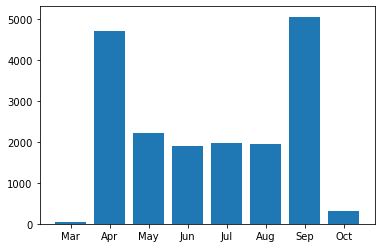

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

qry6 = """
SELECT EXTRACT(MONTH FROM debut) as month, COUNT(playerid)
FROM master
WHERE finalgame IS NOT NULL AND debut IS NOT NULL
GROUP BY month
ORDER BY month ASC;
"""
#schoolid, COUNT(playerid) 
tbl6 = pd.read_sql_query(qry6, engine)
months = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]

plt.bar(months, tbl6["count"])

## What is the effect of table join order on mean salary for the players listed in the main (master) table? *Hint:* Perform two different queries, one that joins on playerID in the salary table and other that joins on the same column in the master table. You will have to use left joins for each since right joins are not currently supported with SQLalchemy.

### Answer:  Salaries table has players repeated 

In [116]:
slry = """
SELECT *
FROM salaries;
"""
#WHERE home_team_goal == away_team_goal;
#cur.execute(get_match)
#cur.fetchmany(10)
slryTbl = pd.read_sql_query(slry, engine)
slryTbl.shape

(23956, 5)

In [121]:
slry = """
SELECT playerid, COUNT(playerid)
FROM salaries
GROUP BY playerid
ORDER BY COUNT(playerid) DESC;
"""
#WHERE home_team_goal == away_team_goal;
#cur.execute(get_match)
#cur.fetchmany(10)
slryTbl2 = pd.read_sql_query(slry, engine)
slryTbl2

,playerid,count
0,moyerja01,25
1,vizquom01,24
2,glavito02,23
3,bondsba01,22
4,griffke02,22
...,...,...
4663,morbajo01,1
4664,kiefest01,1
4665,thompan02,1
4666,sobkosc01,1


In [117]:
mstr = """
SELECT *
FROM master;
"""
#WHERE home_team_goal == away_team_goal;
#cur.execute(get_match)
#cur.fetchmany(10)
mstrTbl = pd.read_sql_query(mstr, engine)
mstrTbl.shape

(18354, 24)

In [133]:
q7_part1 = """
SELECT M.playerid, AVG(S.salary)
FROM master AS m JOIN salaries as S ON M.playerid = S.playerid
GROUP BY M.playerid
ORDER BY COUNT(M.playerid) DESC;
;
"""
#WHERE home_team_goal == away_team_goal;
#cur.execute(get_match)
#cur.fetchmany(10)
q7part1_Tbl = pd.read_sql_query(q7_part1, engine)
print(q7part1_Tbl['avg'].sum())
q7part1_Tbl

4939395318.901422


,playerid,avg
0,moyerja01,3.358700e+06
1,vizquom01,2.633778e+06
2,glavito02,5.636491e+06
3,bondsba01,8.556606e+06
4,thomeji01,6.486894e+06
...,...,...
4663,giarrto01,3.800000e+05
4664,metcatr01,3.920000e+05
4665,penaan01,2.100000e+05
4666,smithch06,2.400000e+05


In [134]:
q7_part2 = """
SELECT M.playerid, AVG(S.salary)
FROM salaries as S JOIN master AS m ON S.playerid = M.playerid
GROUP BY M.playerid
ORDER BY COUNT(M.playerid) DESC;
;
"""
#WHERE home_team_goal == away_team_goal;
#cur.execute(get_match)
#cur.fetchmany(10)
q7part2_Tbl = pd.read_sql_query(q7_part2, engine)
print(q7part2_Tbl['avg'].sum())
q7part2_Tbl

4939395318.901422


,playerid,avg
0,moyerja01,3.358700e+06
1,vizquom01,2.633778e+06
2,glavito02,5.636491e+06
3,bondsba01,8.556606e+06
4,thomeji01,6.486894e+06
...,...,...
4663,giarrto01,3.800000e+05
4664,metcatr01,3.920000e+05
4665,penaan01,2.100000e+05
4666,smithch06,2.400000e+05
